## LSTM On the Merged Data - Final Attempt at finding patterns 

In [1]:
# Imports 
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Final_Merged_Data.csv", index_col=0)

In [3]:
features = df[["Average Sentiment", "Normalised Average Price"]]

In [4]:
# Create Sequences 
def create_sequences(data, sequence_length):
    X, y = [], [] 
    for i in range(len(data) - sequence_length): 
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, 1]) # Normalised Average 
    return np.array(X), np.array(y) 

sequence_length = 10 

X,y = create_sequences(features.values, sequence_length) 

In [5]:
# Create Sequences 
def create_sequences(data, sequence_length):
    X, y = [], [] 
    for i in range(len(data) - sequence_length): 
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, 1]) # Normalised Average 
    return np.array(X), np.array(y) 

sequence_length = 10 

X,y = create_sequences(features.values, sequence_length) 

# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train = X_train.astype('float32')  # Convert to float32

# Build LSTM Model 
model = Sequential() 
model.add(LSTM(50, input_shape=(sequence_length, 2), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Hyperparameter Tuning
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Checkpoint 
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

# Early Stopping 
early_stopping = EarlyStopping(patience=10, restore_best_weights=True) 

2023-11-24 18:35:49.449387: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2023-11-24 18:35:49.449438: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2023-11-24 18:35:49.449448: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2023-11-24 18:35:49.449508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-24 18:35:49.449538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Train The Model 
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/50


2023-11-24 18:35:50.261768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 54ms/step - loss: 0.1312 - val_loss: 0.0581
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0539 - val_loss: 0.0198
Epoch 3/50
1/9 [==>...........................] - ETA: 0s - loss: 0.0290

/opt/homebrew/Caskroom/miniconda/base/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 14ms/step - loss: 0.0374 - val_loss: 0.0167
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0265 - val_loss: 0.0228
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0229 - val_loss: 0.0092
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0173 - val_loss: 0.0086
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0160 - val_loss: 0.0078
Epoch 8/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0147 - val_loss: 0.0085
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0151 - val_loss: 0.0097
Epoch 10/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0148 - val_loss: 0.0079
Epoch 11/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0136 - val_loss: 0.0080
Epoch 12/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0132 - val_loss: 0.0071
Epoch 13/50
9/9 [=====================

In [7]:
# Evaluate the Model
predictions = model.predict(X_test)
mse = np.mean((predictions - y_test)**2)
print(f"Mean Squared Error: {mse}")

2/2 [==============================] - 0s 14ms/step
Mean Squared Error: 0.06677620684881544


1/1 [==============================] - 0s 9ms/step


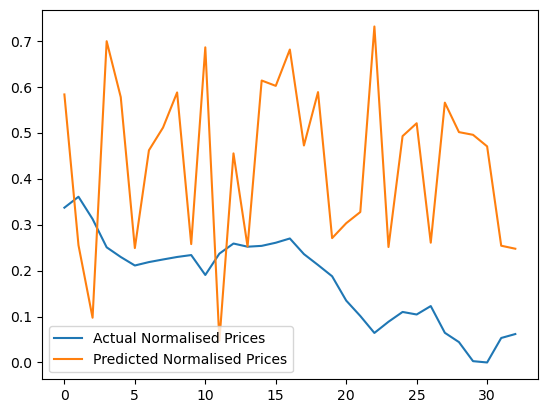

In [8]:
# Load the best model (optional) 
model.load_weights("best_model.h5")

# Make Predictions
last_sequence = X[-1]
prediction = model.predict(np.array([last_sequence]))[0][0]

# Visualize Results
actual_prices = df['Normalised Average Price'].values
plt.plot(actual_prices[-len(predictions):], label='Actual Normalised Prices')
plt.plot(predictions, label='Predicted Normalised Prices')
plt.legend()
plt.show()

# K-fold Cross Validation 

In [9]:
from sklearn.model_selection import TimeSeriesSplit

1/1 [==============================] - 0s 226ms/step
Average Mean Squared Error: 0.030349255145107383


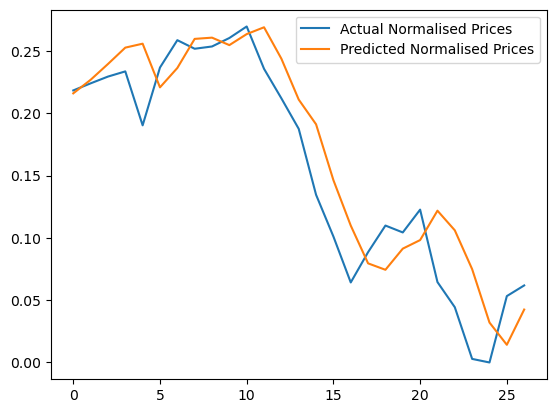

In [10]:
# Split the data into k folds using TimeSeriesSplit 
k = 5 
tcsv = TimeSeriesSplit(n_splits=k) 

# Init an array to store evaluation results 
mse_scores = [] 

# Perform k-fold cross validation 
for train_index, test_index in tcsv.split(X,y): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    
    # create and compile the model (as shown in previous code)
    model = Sequential()
    model.add(LSTM(50, input_shape=(sequence_length, 2), return_sequences=True))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    #Early Stopping 
    # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    
    # Train the model
    history = model.fit(X_train, y_train, batch_size=16, epochs=200, verbose=0)
    
    # Evaluate the model on the test set
    predictions = model.predict(X_test)
    mse = np.mean((predictions - y_test)**2)
    mse_scores.append(mse)
    

# Average MSE over all K folds 
average_mse = np.mean(mse_scores) 
print(f"Average Mean Squared Error: {average_mse}")

# Visualise Results 
actual_prices = df["Normalised Average Price"].values 
plt.plot(actual_prices[-len(predictions):], label="Actual Normalised Prices") 
plt.plot(predictions, label="Predicted Normalised Prices") 
plt.legend() 
plt.savefig("actualvspredictedNormalised.png")
plt.show()

In [11]:
actual_p = actual_prices[-len(predictions):]
export_dataset = pd.DataFrame({'Actual': actual_p, 'Predicted' : predictions.reshape(27,)})

In [12]:
import plotly_express as px 

In [14]:
px.line(export_dataset)